In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from sklearn.ensemble import RandomForestRegressor

In [3]:
os.getcwd()

'C:\\Users\\User\\Documents\\Projects\\KaggleHousePrice\\models'

quantitative feature 중 noramlization 필요한 것들 normalization

In [4]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [5]:
predictor_cols = [f for f in train.columns if train.dtypes[f] != 'object']
predictor_cols.remove('SalePrice')
predictor_cols.remove('Id')

In [6]:
X = train[predictor_cols].fillna(0.).values
y = np.log(train['SalePrice'].values)

In [7]:
X.shape, y.shape

((1460, 36), (1460,))

# Feature engineering

In [12]:
import scipy.stats as st
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [104]:
from sklearn import preprocessing

def normalize_features (df, predictor_cols, normalize_cols):
    features = df[normalize_cols].fillna(.0)
    
    scaler = preprocessing.StandardScaler()
    scaled_df = scaler.fit_transform(features)
    normalized_df = preprocessing.normalize(scaled_df)
    
    normalized_features = pd.DataFrame({normalize_cols[0]:normalized_df[:,0],
                        normalize_cols[1]:normalized_df[:,1],
                        normalize_cols[2]:normalized_df[:,2],
                        normalize_cols[3]:normalized_df[:,3],
                        normalize_cols[4]:normalized_df[:,4],
                        normalize_cols[5]:normalized_df[:,5],
                       })
    
    for col in normalize_cols:
        if (col in predictor_cols):
            predictor_cols.remove(col)
    
    X0 = df[predictor_cols].fillna(.0)
    X1 = normalized_features
    return np.concatenate([X0, X1], axis=1)

In [105]:
normalize_cols = ['LotFrontage', 'LotArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']

In [106]:
features = train[normalize_cols].fillna(.0)

In [50]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(features)
normalized_df = preprocessing.normalize(scaled_df)

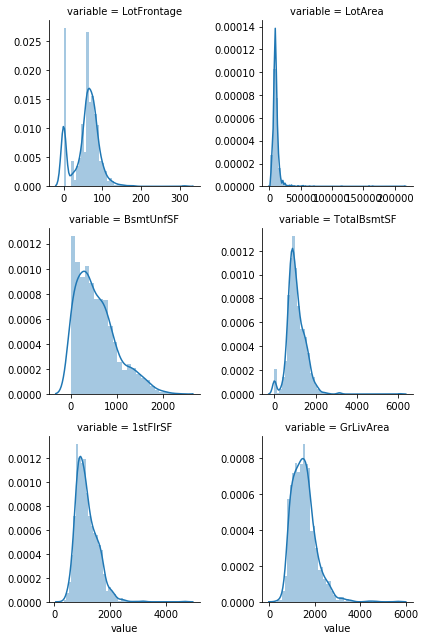

In [51]:
f = pd.melt(features, value_vars=normalize_cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [52]:
normalized_features = pd.DataFrame({normalize_cols[0]:normalized_df[:,0],
                        normalize_cols[1]:normalized_df[:,1],
                        normalize_cols[2]:normalized_df[:,2],
                        normalize_cols[3]:normalized_df[:,3],
                        normalize_cols[4]:normalized_df[:,4],
                        normalize_cols[5]:normalized_df[:,5],
                       })

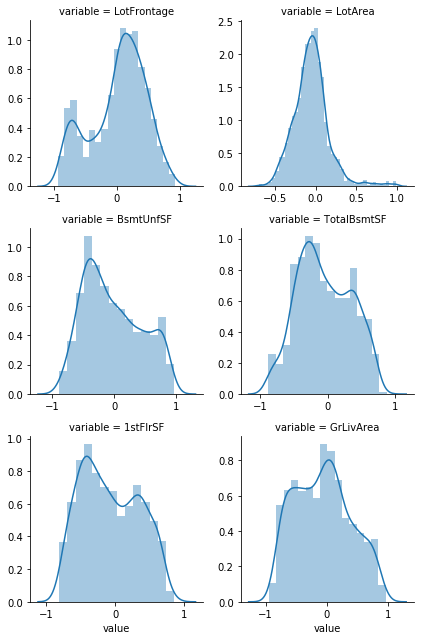

In [54]:
f = pd.melt(normalized_features, value_vars=normalize_cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

# Training

In [55]:
normalize_cols

['LotFrontage', 'LotArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']

In [108]:
normalized_X = normalize_features (train, predictor_cols, normalize_cols)

In [109]:
normalized_X.shape

(1460, 36)

In [110]:
# Random Forest regression
model = RandomForestRegressor()
model.fit(normalized_X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# Test

In [111]:
test = pd.read_csv('../input/test.csv')
test_X = normalize_features (test, predictor_cols, normalize_cols)
predicted_prices = np.exp(model.predict(test_X))
print(predicted_prices)

[125424.29360946 145288.00592227 173246.64756641 ... 165399.2655346
 113186.17728044 242222.19678414]


In [113]:
test_X.shape

(1459, 36)

# Submission

In [112]:
submission_filename = '../submissions/submission_0.4.csv'
submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
submission.to_csv(submission_filename, index=False)

# 0.22749